# 📊 Marketing Campaign Optimization Project


Marketing Campaign Effectiveness Analysis: Methodology and Goals

This mock dataset has been developed to demonstrate how to evaluate the effectiveness of marketing campaigns using advanced analytics techniques. The structure and approach are based on real-world use cases and insights gathered from my experience as a Senior Data Analyst.

Analysis Approach

The analysis will follow a structured approach:

Data Cleaning & Exploration

We begin by preparing the dataset for analysis, identifying outliers, inconsistencies, and missing values.

Descriptive Analysis

We summarize key performance indicators (KPIs) such as average conversion rates by channel and customer segment.

Cohort Analysis

We will analyze monthly user cohorts in terms of Spend in USD.

Comparative Effectiveness Analysis

Using both classical A/B testing and Bayesian A/B testing, we compare the performance of marketing channels across various customer segments to understand statistical significance and probability-based insights.

Campaign-Level Causal Inference

Finally, we dive deeper into individual campaigns to assess their lift using causal inference techniques. This helps isolate the actual impact of campaigns from other confounding factors.

Through this layered analysis, we aim to answer critical business questions around which channels and campaigns are truly driving value, and how performance varies by audience segment.

Questions to answer:

    - Which campaigns and which channels perform the best? 
    
    - Which segment is highest in the conversion rate?
    
    - Which campaigns and in which channel generate the highest and lowest conversion rates?
    
    - Which channels and for which segment are the most effective according to t-test versus Bayesian approach?


This project analyzes marketing campaign data to:
- Assess data quality
- Perfprm A/B test using frequentist and Bayesian approaches
- Perform cohort and causal inference analyses
- Compare campaign effectiveness


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_campaign_dataset_large_50k.csv')
df.head()

,Campaign_ID,Date,Channel,Region,Segment,Spend_USD,Impressions,Clicks,CTR,Conversions,...,Landing_Page,Gender,Group,First_Seen_Date,Conversion_Rate,CPC,CPA,Week,Month,Quarter
0,CAMPAIGN_6,2023-08-15,Email,North,Students,3774.642606,40719.495804,6730.806181,0.159643,1127.325682,...,Homepage,Female,B,2023-08-02,0.180817,0.653394,8.036662,33,8,3
1,CAMPAIGN_10,2023-01-06,Display Ads,North,Students,7610.896365,10162.408939,0.000000,0.032450,128.950384,...,Signup Page,Male,A,2022-12-22,0.224586,13.710922,61.536526,1,1,1
2,CAMPAIGN_6,2023-10-16,Social Media,East,Retirees,8938.235614,15883.220539,1107.567862,0.078024,252.924939,...,Signup Page,Other,A,2023-10-16,0.205324,0.398849,0.000000,42,10,4
3,CAMPAIGN_4,2023-06-11,Search,West,Retirees,2493.890844,17877.642767,851.623100,0.037078,24.629184,...,Promo Page,Male,B,2023-06-10,0.064244,3.194810,59.600877,23,6,2
4,CAMPAIGN_6,2023-08-09,Social Media,West,Retirees,0.000000,86503.677046,16754.856152,0.192745,3087.896520,...,Homepage,Other,A,2023-08-09,0.178099,0.122110,0.000000,32,8,3


In [58]:
# Convert dates and drop unnecessary column
df['Date'] = pd.to_datetime(df['Date'])
df['First_Seen_Date'] = pd.to_datetime(df['First_Seen_Date'])

## 2. Exploratory Data Analysis (EDA)

In [59]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Campaign_ID      50000 non-null  object        
 1   Date             50000 non-null  datetime64[ns]
 2   Channel          50000 non-null  object        
 3   Region           50000 non-null  object        
 4   Segment          50000 non-null  object        
 5   Spend_USD        46497 non-null  float64       
 6   Impressions      50000 non-null  float64       
 7   Clicks           50000 non-null  float64       
 8   CTR              46497 non-null  float64       
 9   Conversions      46497 non-null  float64       
 10  User_ID          50000 non-null  object        
 11  Device           50000 non-null  object        
 12  Source           50000 non-null  object        
 13  Landing_Page     50000 non-null  object        
 14  Gender           50000 non-null  objec

In [60]:
# Missing values
print("\n Missing values by column:\n")
print(df.isnull().sum())

# Unique categorial values by attributes
categorical_cols = df.select_dtypes(include='object').columns
print("\n Uniq values by attributes:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


 Missing values by column:

Campaign_ID           0
Date                  0
Channel               0
Region                0
Segment               0
Spend_USD          3503
Impressions           0
Clicks                0
CTR                3503
Conversions        3503
User_ID               0
Device                0
Source                0
Landing_Page          0
Gender                0
Group                 0
First_Seen_Date       0
Conversion_Rate       0
CPC                   0
CPA                   0
Week                  0
Month                 0
Quarter               0
dtype: int64

 Uniq values by attributes:
Campaign_ID: 10 unique values
Channel: 6 unique values
Region: 4 unique values
Segment: 5 unique values
User_ID: 500 unique values
Device: 3 unique values
Source: 3 unique values
Landing_Page: 3 unique values
Gender: 3 unique values
Group: 2 unique values


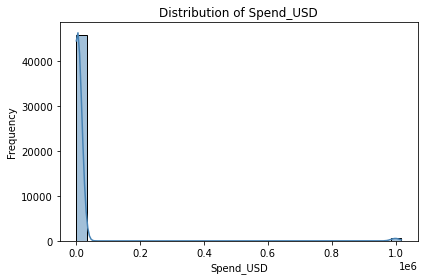

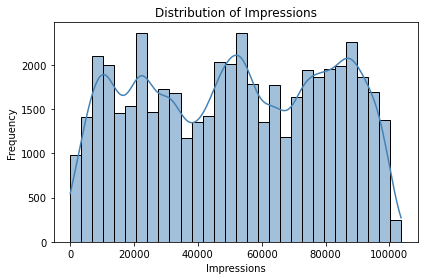

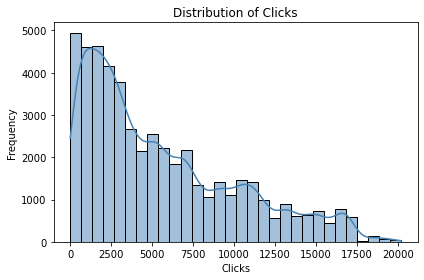

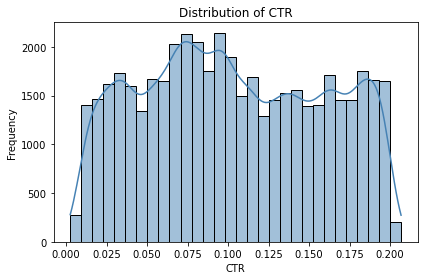

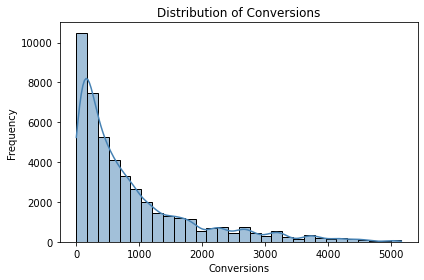

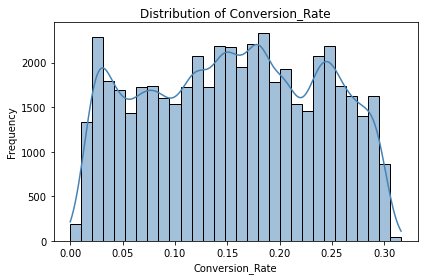

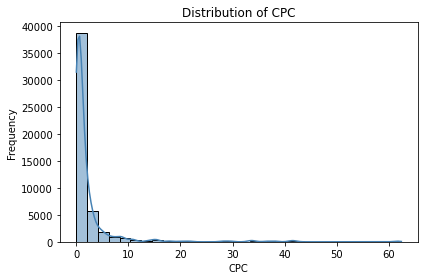

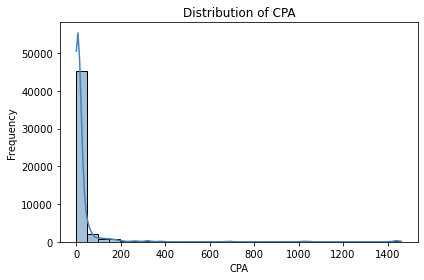

In [61]:
# ----------------------------
# 1. Distribution of Numerical Features
# ----------------------------
numerical_features = [
    'Spend_USD', 'Impressions', 'Clicks', 'CTR',
    'Conversions', 'Conversion_Rate', 'CPC', 'CPA'
]

for feature in numerical_features:
    plt.figure()
    sns.histplot(df[feature], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Outlier Summary (based on IQR method):
                 outliers_count   lower_bound    upper_bound
CPA                      5626.0    -21.745007      39.949413
CPC                      5461.0     -2.052125       4.195327
Conversions              3480.0  -1262.116442    2622.171399
Spend_USD                 787.0 -10718.813554   17864.689256
Clicks                    253.0  -8054.409508   18152.199596
Impressions                 0.0 -52487.643760  155418.801405
CTR                         0.0     -0.078714       0.288548
Conversion_Rate             0.0     -0.123293       0.434855
Week                        0.0    -25.000000      79.000000
Month                       0.0     -5.000000      19.000000
Quarter                     0.0     -1.000000       7.000000


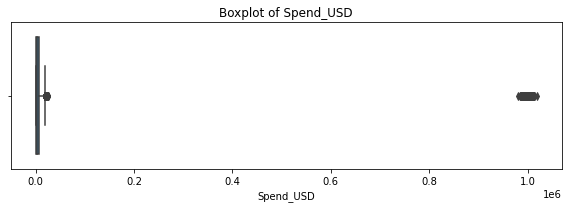

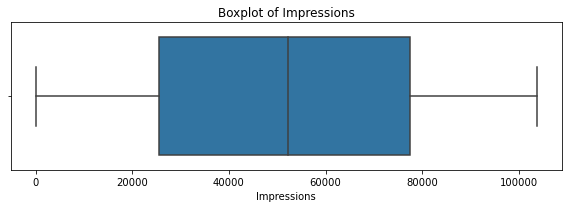

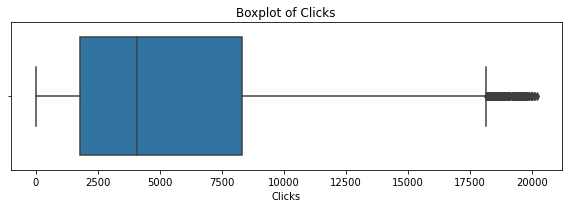

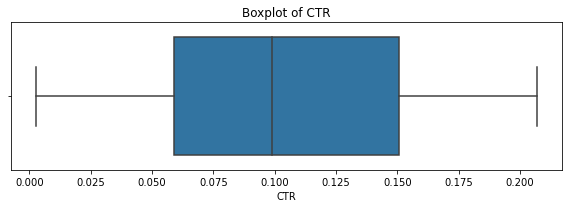

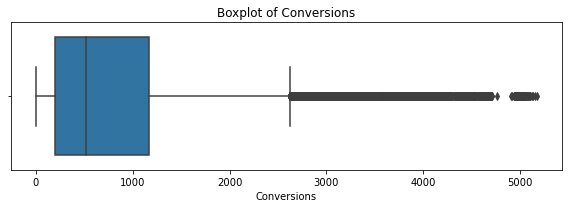

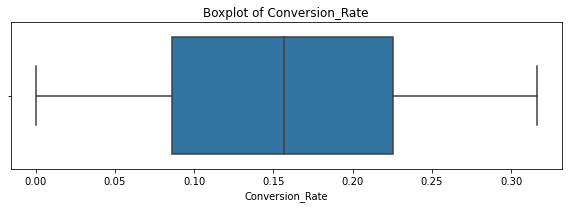

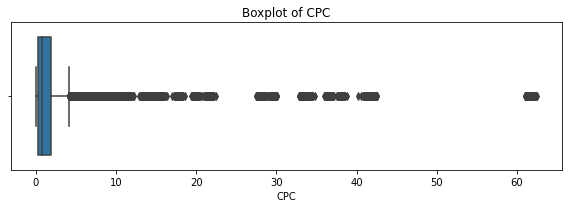

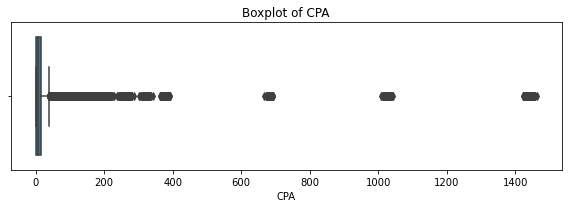

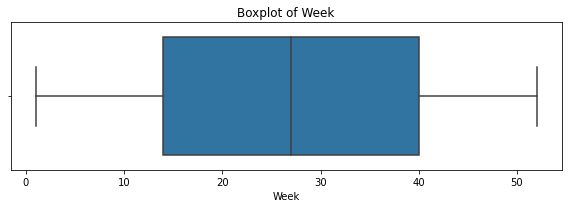

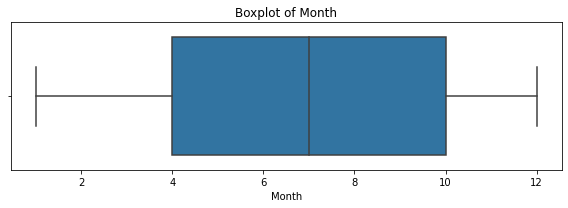

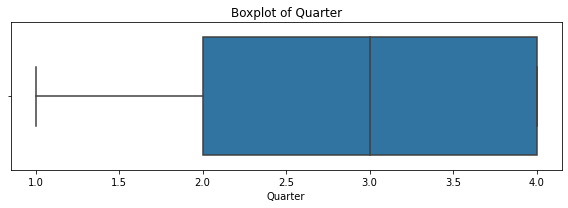

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numerical columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 2: Detect outliers using IQR method
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_summary[col] = {
        "outliers_count": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

# Step 3: Display the summary
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by="outliers_count", ascending=False)
print("Outlier Summary (based on IQR method):")
print(outlier_df)

# Step 4: Optional visualization
for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


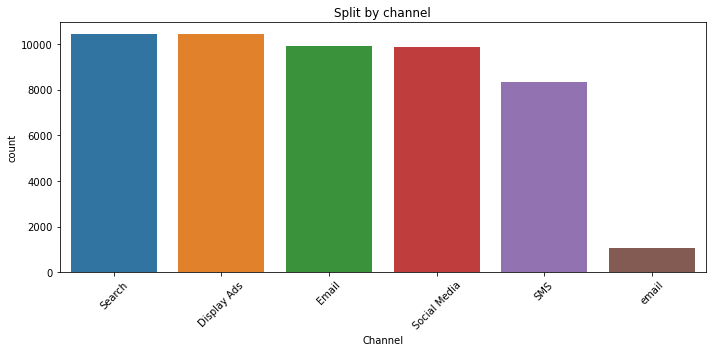

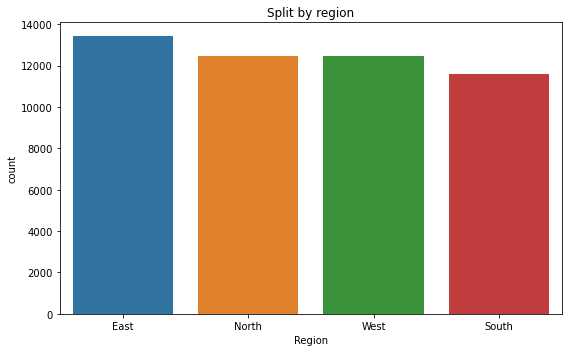

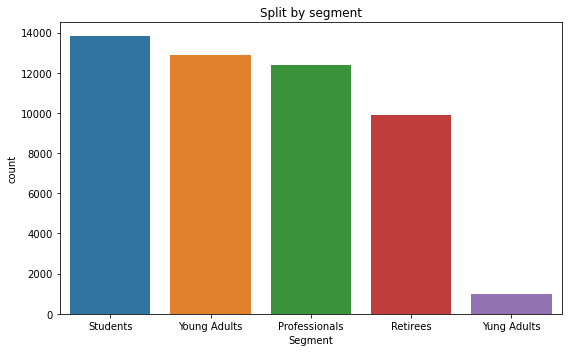

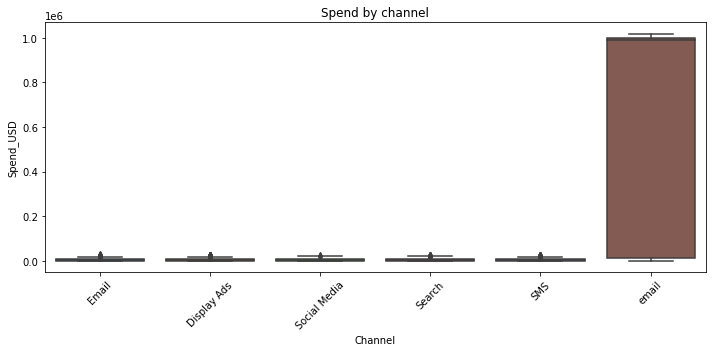

In [71]:
# Distribution of values by channel
plt.figure(figsize=(10, 5))
sns.countplot(x='Channel', data=df, order=df['Channel'].value_counts().index)
plt.title('Split by channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of values by region
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=df, order=df['Region'].value_counts().index)
plt.title('Split by region')
plt.tight_layout()
plt.show()

# Distribution of values by segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().index)
plt.title('Split by segment')
plt.tight_layout()
plt.show()

# Boxplot of Spend_USD
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Channel', y='Spend_USD')
plt.title('Spend by channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


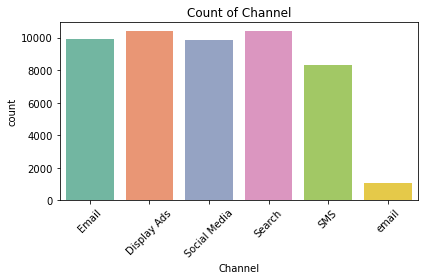

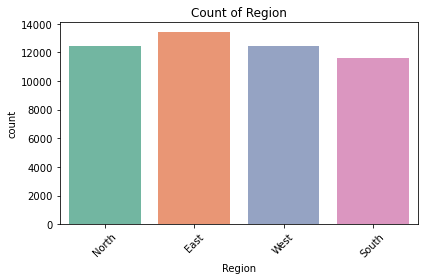

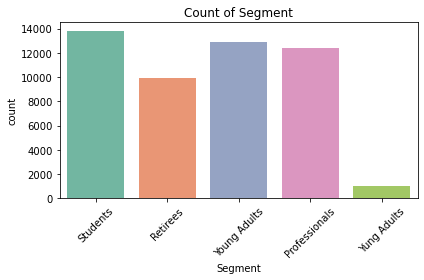

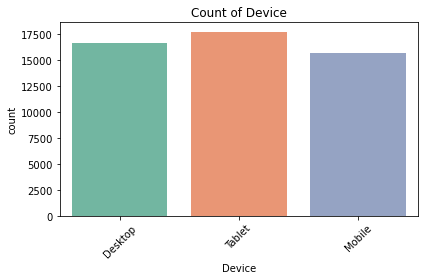

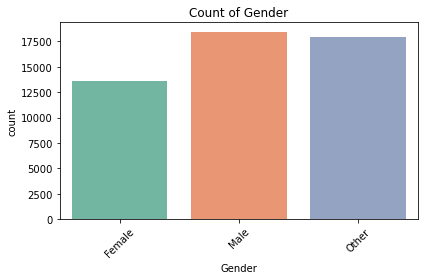

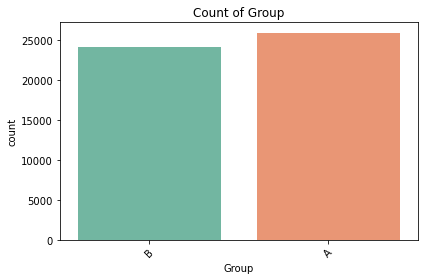

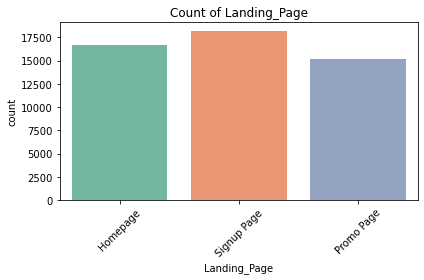

In [72]:
# ----------------------------
# Count Plots for Categorical Features
# ----------------------------
categorical_features = [
    'Channel', 'Region', 'Segment', 'Device',
    'Gender', 'Group', 'Landing_Page'
]

for feature in categorical_features:
    plt.figure()
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


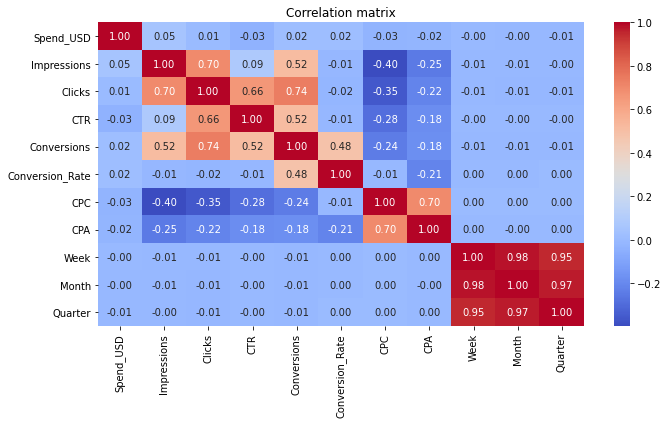

In [73]:
# Pairplot 
# sns.pairplot(df[['Spend_USD', 'Impressions', 'Clicks', 'Conversions', 'CTR', 'Conversion_Rate']])

import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

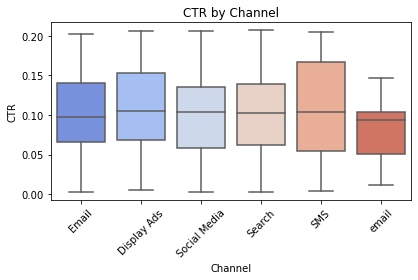

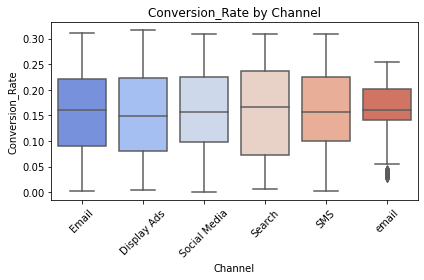

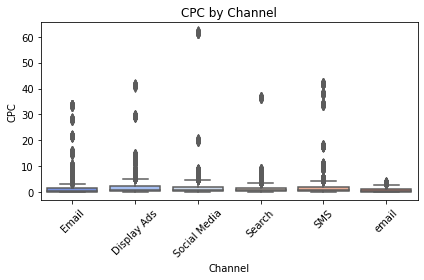

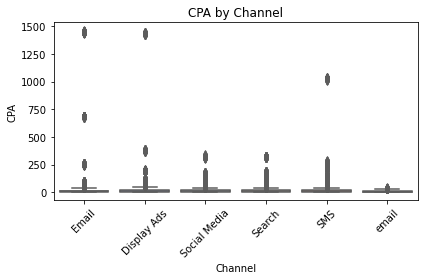

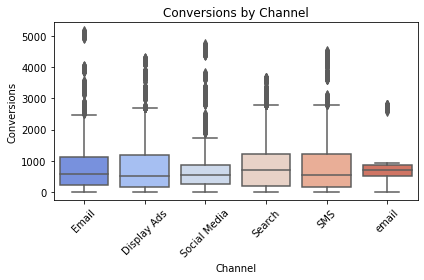

In [74]:
# ----------------------------
# 3. Box Plots of Performance Metrics by Channel
# ----------------------------
performance_metrics = ['CTR', 'Conversion_Rate', 'CPC', 'CPA','Conversions']

for metric in performance_metrics:
    plt.figure()
    sns.boxplot(data=df, x='Channel', y=metric, palette='coolwarm')
    plt.title(f'{metric} by Channel')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Data Cleaning

# 3.1. Handling missing values

In [67]:
# Display number of missing values per column before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Impute missing values in numeric columns with the column mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Display number of missing values per column after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
Campaign_ID           0
Date                  0
Channel               0
Region                0
Segment               0
Spend_USD          3503
Impressions           0
Clicks                0
CTR                3503
Conversions        3503
User_ID               0
Device                0
Source                0
Landing_Page          0
Gender                0
Group                 0
First_Seen_Date       0
Conversion_Rate       0
CPC                   0
CPA                   0
Week                  0
Month                 0
Quarter               0
dtype: int64

Missing values after imputation:
Campaign_ID        0
Date               0
Channel            0
Region             0
Segment            0
Spend_USD          0
Impressions        0
Clicks             0
CTR                0
Conversions        0
User_ID            0
Device             0
Source             0
Landing_Page       0
Gender             0
Group              0
First_Seen_Date    0
Conversion

# 3.2. Outliers

In [68]:

# Step 1: Define time-related columns to exclude
time_columns = ['Date', 'Activity_Date', 'Activity_Month', 'Cohort_Month']
df_fixed = df.copy()

# Step 2: Select numeric columns excluding time variables
numeric_cols = df_fixed.drop(columns=[col for col in time_columns if col in df_fixed.columns], errors='ignore')
numeric_cols = numeric_cols.select_dtypes(include='number').columns

# Step 3: Cap outliers using IQR method
for col in numeric_cols:
    Q1 = df_fixed[col].quantile(0.25)
    Q3 = df_fixed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorization (Capping)
    df_fixed[col] = df_fixed[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped using IQR method.")


Outliers capped using IQR method.


Outlier Count Per Numeric Column (Excluding Time):
Column                       Before     After
---------------------------------------------
Spend_USD                       612         0
Impressions                       0         0
Clicks                          253         0
CTR                               0         0
Conversions                    4083         0
Conversion_Rate                   0         0
CPC                            5461         0
CPA                            5626         0


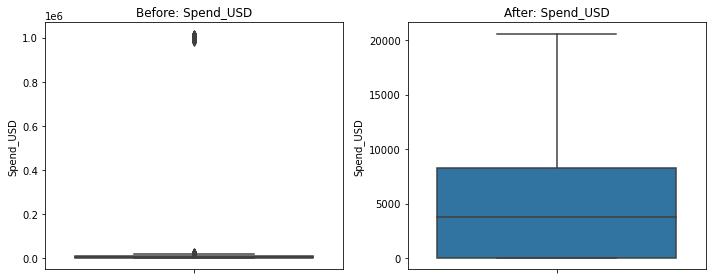

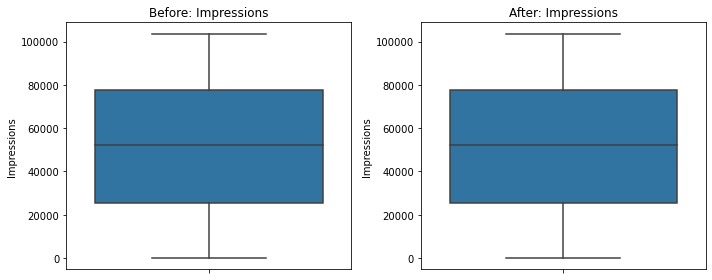

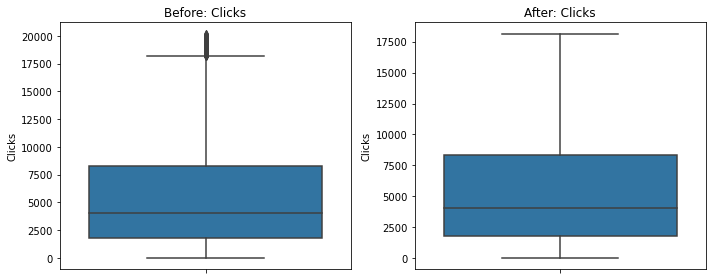

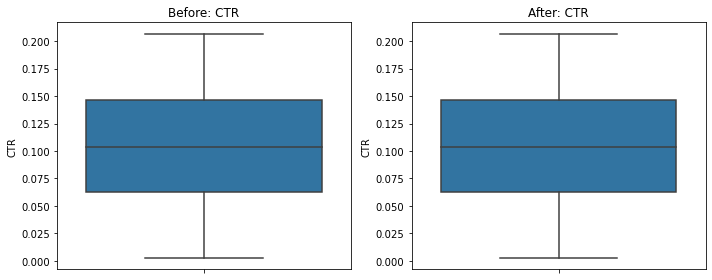

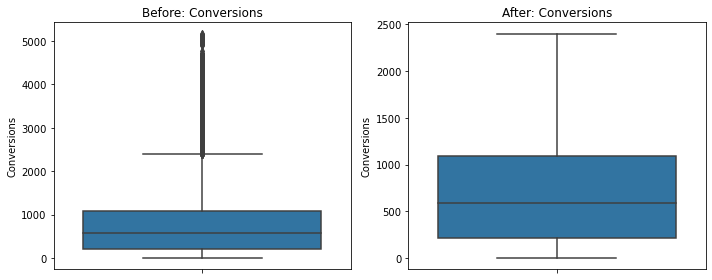

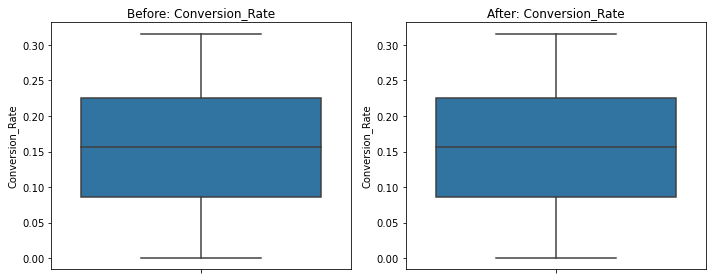

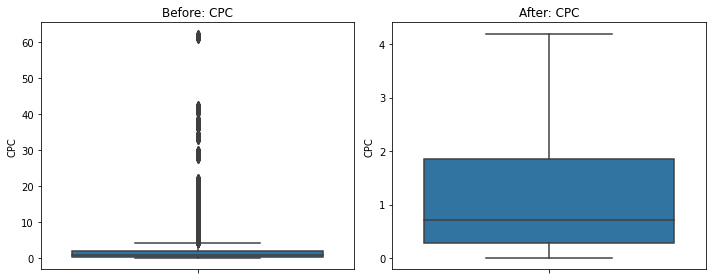

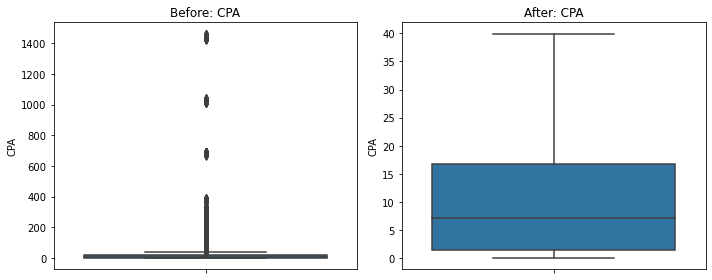

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define time columns to exclude
time_columns = ['Date', 'Activity_Date', 'Activity_Month', 'Cohort_Month', 'Month', 'Week', 'Quarter']

# Select only numeric columns excluding time
numeric_cols = df_fixed.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col not in time_columns]

# Helper function to detect IQR-based outliers
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Print comparison of outlier counts before and after fixing
print("Outlier Count Per Numeric Column (Excluding Time):")
print(f"{'Column':<25}{'Before':>10}{'After':>10}")
print("-" * 45)
for col in numeric_cols:
    before = detect_outliers_iqr(df[col])
    after = detect_outliers_iqr(df_fixed[col])
    print(f"{col:<25}{before:>10}{after:>10}")

# Optional: visualize before and after using boxplots
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f"Before: {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_fixed[col])
    plt.title(f"After: {col}")

    plt.tight_layout()
    plt.show()


# 3.3. Fixing mispelled segment name

In [19]:
print("Before correction:", df_fixed['Segment'].unique())

# Correct the misspelled value
df_fixed['Segment'] = df_fixed['Segment'].replace('Yung Adults', 'Young Adults')

# Verify correction
print("After correction:", df_fixed['Segment'].unique())


Before correction: ['Students' 'Retirees' 'Young Adults' 'Professionals']
After correction: ['Students' 'Retirees' 'Young Adults' 'Professionals']


In [20]:
print("Before correction:", df_fixed['Channel'].unique())

# Correct the misspelled value
df_fixed['Channel'] = df_fixed['Channel'].replace('email', 'Email')

# Verify correction
print("After correction:", df_fixed['Channel'].unique())


Before correction: ['Email' 'Display Ads' 'Social Media' 'Search' 'SMS']
After correction: ['Email' 'Display Ads' 'Social Media' 'Search' 'SMS']


# 4.Cohort analysis

Next, we will conduct cohort analysis to learn:
    
- Which cohorts are higher-value over time

- Which months produced loyal customers (e.g., higher Month 3/Month 1 retention ratio)

- How quickly customer value drops off

Differences in spend by campaign (if you segment by Campaign_ID too)

In [60]:
# Group by user to get user-level data
user_level_df = df_fixed.groupby('User_ID').agg({
    'Campaign_ID': 'first',
    'Date': 'min',  # Earliest activity date
    'Channel': 'first',
    'Region': 'first',
    'Segment': 'first',
    'Spend_USD': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'CTR': 'mean',
    'Conversions': 'sum',
    'Device': 'first',
    'Source': 'first',
    'Landing_Page': 'first',
    'Gender': 'first',
    'Group': 'first',
    'First_Seen_Date': 'min',
    'Conversion_Rate': 'mean',
    'CPC': 'mean',
    'CPA': 'mean',
    'Week': 'min',
    'Month': 'min',
    'Quarter': 'min'
}).reset_index()



In [61]:
user_level_df.head()

,User_ID,Campaign_ID,Date,Channel,Region,Segment,Spend_USD,Impressions,Clicks,CTR,...,Gender,Group,First_Seen_Date,Conversion_Rate,CPC,CPA,Week,Month,Quarter,ROC
0,002962bd-a415-4d66-b7f3-46c42beb215a,CAMPAIGN_4,2023-01-01,Search,North,Young Adults,252394.370124,9.459608e+05,3.017654e+04,0.035354,...,Male,B,2022-12-10,0.073836,3.571210,39.895241,1,1,1,0.010790
1,002a4985-3dfc-418b-9edb-6badab7ec70a,CAMPAIGN_9,2023-01-04,Email,East,Young Adults,422960.738554,7.819288e+06,1.097866e+06,0.139521,...,Male,A,2022-12-15,0.229135,0.351994,3.208764,1,1,1,0.545135
2,0039ab95-b3f3-46b5-96fa-478e725d5001,CAMPAIGN_8,2023-01-01,Social Media,North,Young Adults,243092.337566,9.288576e+06,3.209879e+05,0.034653,...,Female,B,2022-12-17,0.185725,0.297686,2.917416,1,1,1,0.248532
3,006ff2b4-f13d-46f6-bb0d-4f079ec60d03,CAMPAIGN_6,2023-01-01,SMS,North,Professionals,550613.281911,3.048184e+06,4.901897e+05,0.159934,...,Female,A,2022-12-14,0.017070,0.921570,39.917787,1,1,1,0.016284
4,00d755c8-5d4a-48ca-81b5-e1ab853c6cee,CAMPAIGN_1,2023-01-03,Social Media,West,Professionals,513658.959261,5.959597e+06,9.539105e+05,0.159897,...,Other,A,2022-12-26,0.121334,0.535722,5.268298,1,1,1,0.224032


In [62]:
user_level_df['Activity_Date'] = pd.to_datetime(user_level_df['First_Seen_Date'])  # if not datetime yet
user_level_df['Activity_Month'] = user_level_df['First_Seen_Date'].dt.to_period('M')


In [63]:
# If you have an 'Activity_Month' as a datetime or period representing user activity month

# Step 1: Find first activity month (cohort month) for each user
user_first_month = user_level_df.groupby('User_ID')['Activity_Month'].min().reset_index()
user_first_month.rename(columns={'Activity_Month': 'Cohort_Month'}, inplace=True)

# Step 2: Merge back to original df to assign each user’s cohort month
user_level_df = user_level_df.merge(user_first_month, on='User_ID', how='left')


In [65]:
# Total spend per cohort
cohort_spend = user_level_df.groupby('Cohort_Month')['Spend_USD'].sum().reset_index()
cohort_spend = cohort_spend.sort_values('Spend_USD', ascending=False)

print(cohort_spend)


  Cohort_Month     Spend_USD
0      2022-12  2.556630e+08
1      2023-01  3.564094e+06


In [66]:
# Average spend per user per cohort
cohort_avg_spend = user_level_df.groupby('Cohort_Month')['Spend_USD'].mean().reset_index()
cohort_avg_spend = cohort_avg_spend.sort_values('Spend_USD', ascending=False)

print(cohort_avg_spend)


  Cohort_Month      Spend_USD
0      2022-12  520698.579211
1      2023-01  396010.438700


## 3. A/B Testing (CTR & Conversions by Channel)


**A/B testing** is a method used to compare two (or more) versions of something — like a webpage, ad, or email — to determine which one performs better based on a specific metric (e.g., **conversion rate**, **click-through rate**, **revenue**, etc.).

You randomly assign users to:

* **Group A**: The current version (control)
* **Group B**: The new version (variant)

You then **measure outcomes** and determine if the difference between A and B is statistically meaningful — i.e., not due to chance.

---

## **Why Use A/B Testing?**

A/B testing helps answer questions like:

* Did the new ad **increase conversions**?
* Did changing the email subject line **improve open rates**?
* Is version B **better**, or was it just **random luck**?

A/B testing gives you **confidence** that your decision is **data-driven**, not a guess.

---

## There Are Two Main Approaches:

---

##  **Frequentist A/B Testing**

### What it does:

* Assumes there's a **true fixed effect** (e.g., a real conversion rate difference).
* Uses statistical tests (like **t-tests**, **chi-squared**, etc.).
* Calculates a **p-value**: the probability of seeing your results (or more extreme ones) **just by chance**, if there is actually **no real difference**.

###  You get:

* A **p-value** and decide significance (e.g., p < 0.05).
* A **confidence interval** (e.g., "B performs 2% better, ±1%").

### When it's useful:

* When you want **clear rules** (like p < 0.05).
* When you have a **large sample size** and want simplicity.

###  Limitations:

* You can’t interpret p-values as "the probability B is better."
* Results can be **sensitive to sample size** and stopping rules.

---

## 2. **Bayesian A/B Testing**

### What it does:

* Treats the effect (e.g., conversion rate) as **a probability distribution**, not a fixed number.
* Combines **prior beliefs** with data to update what’s **most likely true**.

### You get:

* **Probability B is better than A** (e.g., "There's a 78% chance B is better").
* **Expected lift** and full distributions of outcomes.

###  When it’s useful:

* You want **intuitive answers** ("How confident are we that B is better?").
* You want to **adapt the test mid-way** (Bayesian is more flexible).
* You care about **decision-making** (not just statistical significance).

###  Limitations:

* Can be **more complex** to set up and interpret.
* Depends on **choice of priors** (though often defaults work fine).

---

## Summary Comparison

| Feature              | Frequentist A/B Test               | Bayesian A/B Test                              |
| -------------------- | ---------------------------------- | ---------------------------------------------- |
| **What you get**     | p-value, confidence interval       | Probability B is better, expected lift         |
| **Interpretability** | Less intuitive                     | Very intuitive                                 |
| **Flexibility**      | Rigid (fixed sample size, p-value) | Flexible (can stop early, update continuously) |
| **Approach**         | Long-run frequency view            | Probabilistic belief updating                  |
| **Common use cases** | Traditional scientific analysis    | Decision-making, product optimization          |

---


Using both methods can give you **more robust and nuanced insights**:

* **Frequentist** helps you understand statistical **significance**.
* **Bayesian** helps you understand **practical significance** and **decision confidence**.

For example:

* A frequentist test may say: “p = 0.04” (statistically significant).
* A Bayesian test may say: “There's a 93% chance version B is better” (decision confidence).



In [33]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Step 1: Group by Segment, Channel, and compute mean conversion rate
conversion_data = df_fixed.groupby(['Segment', 'Channel']).agg(
    mean_cvr=('Conversion_Rate', 'mean'),
    cvr_values=('Conversion_Rate', lambda x: list(x))
).reset_index()

# Step 2: Create all possible channel pairs within each segment
results = []

segments = conversion_data['Segment'].unique()

for segment in segments:
    segment_data = conversion_data[conversion_data['Segment'] == segment]
    channels = segment_data['Channel'].values
    
    for i in range(len(channels)):
        for j in range(i + 1, len(channels)):
            channel_1 = channels[i]
            channel_2 = channels[j]
            
            group_1 = segment_data[segment_data['Channel'] == channel_1]['cvr_values'].values[0]
            group_2 = segment_data[segment_data['Channel'] == channel_2]['cvr_values'].values[0]
            
            # T-test on conversion rate
            stat, p_value = ttest_ind(group_1, group_2, equal_var=False)
            
            results.append({
                'Segment': segment,
                'Channel_1': channel_1,
                'Channel_2': channel_2,
                'Channel_1_mean_CVR': pd.Series(group_1).mean(),
                'Channel_2_mean_CVR': pd.Series(group_2).mean(),
                'p_value': p_value
            })

# Step 3: Create dataframe and apply multiple testing correction
ab_cvr_df = pd.DataFrame(results)
ab_cvr_df['p_adj'] = multipletests(ab_cvr_df['p_value'], method='fdr_bh')[1]
ab_cvr_df['Significant'] = ab_cvr_df['p_adj'] < 0.05

# Step 4: Display results
ab_cvr_df = ab_cvr_df.sort_values('p_adj')
print(ab_cvr_df)


          Segment    Channel_1     Channel_2  Channel_1_mean_CVR  \
23       Students  Display Ads  Social Media            0.134504   
29       Students       Search  Social Media            0.140639   
19       Retirees       Search  Social Media            0.176606   
16       Retirees        Email  Social Media            0.166631   
13       Retirees  Display Ads  Social Media            0.166857   
20       Students  Display Ads         Email            0.134504   
28       Students          SMS  Social Media            0.153388   
26       Students        Email  Social Media            0.155121   
21       Students  Display Ads           SMS            0.134504   
5   Professionals        Email        Search            0.146934   
18       Retirees          SMS  Social Media            0.160581   
9   Professionals       Search  Social Media            0.166774   
37   Young Adults          SMS        Search            0.160520   
39   Young Adults       Search  Social Media    

Frequentist A/B Test Key Insights (CVR-Based)

1. Strong Statistical Differences

Most pairwise comparisons were statistically significant (adjusted p < 0.05).

Top results involved:

Students: Social Media outperforms Display Ads and Email.

Retirees: Search and Email both outperform Social Media and Display Ads.

Professionals: Search outperforms Display Ads and Email.

2. Specific Findings

Retirees: Search > Social Media (p < 1e-44), Email > Social Media (p < 1e-27)

Students: Email > Display Ads, Search > SMS

Young Adults: Search > Email, Display Ads > Email

Professionals: Search consistently performs best


# 4.Bayesian A/B testing

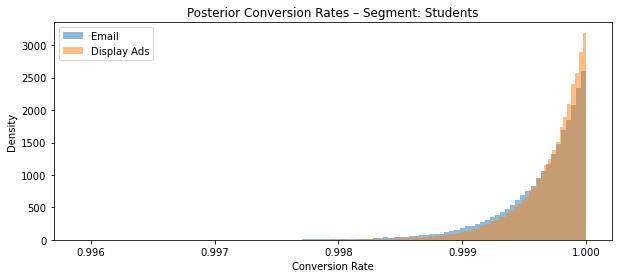

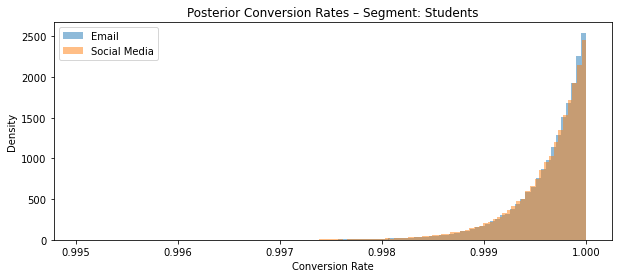

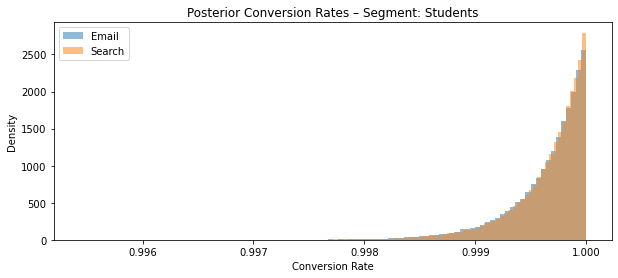

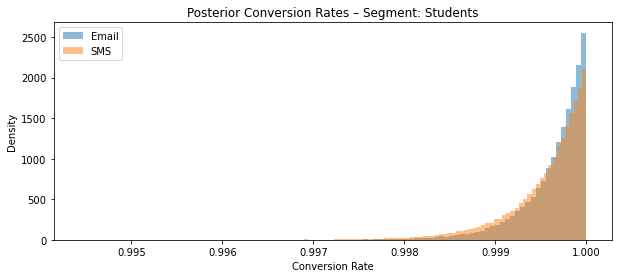

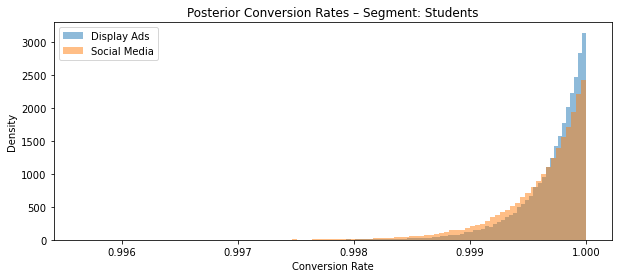

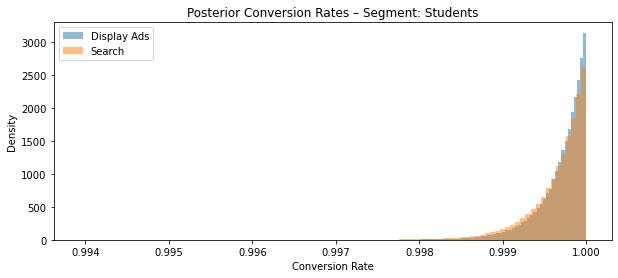

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
from itertools import combinations

# Settings
segment_col = 'Segment'
outcome_col = 'Conversion_Rate'  
channels = df_fixed['Channel'].unique()
segments = df_fixed[segment_col].unique()

# Priors for Beta distribution
alpha_prior, beta_prior = 1, 1

# Store results
bayes_results = []

# Loop over each segment
for segment in segments:
    seg_df = df_fixed[df_fixed[segment_col] == segment]
    
    for ch1, ch2 in combinations(channels, 2):
        grp1 = seg_df[seg_df['Channel'] == ch1]
        grp2 = seg_df[seg_df['Channel'] == ch2]

        conversions_1 = (grp1[outcome_col] > 0).sum()
        trials_1 = len(grp1)
        conversions_2 = (grp2[outcome_col] > 0).sum()
        trials_2 = len(grp2)

        if trials_1 < 10 or trials_2 < 10:
            bayes_results.append({
                'Segment': segment,
                'Channel_1': ch1,
                'Channel_2': ch2,
                'Note': 'Too few samples',
                'Prob_2_Better (%)': None,
                'Mean Lift (%)': None
            })
            continue

        # Posteriors
        post_1 = beta(alpha_prior + conversions_1, beta_prior + trials_1 - conversions_1)
        post_2 = beta(alpha_prior + conversions_2, beta_prior + trials_2 - conversions_2)

        samples_1 = post_1.rvs(100000)
        samples_2 = post_2.rvs(100000)

        prob_2_better = np.mean(samples_2 > samples_1)
        lift = (samples_2 - samples_1) / samples_1

        bayes_results.append({
            'Segment': segment,
            'Channel_1': ch1,
            'Channel_2': ch2,
            'Prob_2_Better (%)': round(prob_2_better * 100, 2),
            'Mean Lift (%)': round(np.mean(lift) * 100, 2),
            'Note': 'OK'
        })

        # Optional: Plot posterior distributions
        plt.figure(figsize=(10, 4))
        plt.hist(samples_1, bins=100, alpha=0.5, label=f"{ch1}", density=True)
        plt.hist(samples_2, bins=100, alpha=0.5, label=f"{ch2}", density=True)
        plt.title(f"Posterior Conversion Rates – Segment: {segment}")
        plt.xlabel("Conversion Rate")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

# Results to DataFrame
bayes_results_df = pd.DataFrame(bayes_results)
print(bayes_results_df)


Key Insights from Bayesian A/B Testing

1. Segment: Retirees
Email consistently outperforms Display Ads, Social Media, and Search.

Highest probabilities:

Email > Display Ads: 61.47%

Email > Search: 59.58%

Preferred Channel: Email

2. Segment: Young Adults

Social Media, Search, and SMS slightly outperform Display Ads.

Notably:

Social Media > Display Ads: 63.42%

SMS > Display Ads: 60.10%

Preferred Channels: Social Media / Search / SMS (over Display Ads)

3. Segment: Professionals

Bayesian results suggest Search and SMS outperform Social Media.

Social Media < Search: 77.80%

Social Media < SMS: 70.08%

However, Social Media appears better than Email and Display Ads:

Social Media > Email: 81.51%

Social Media > Display Ads: 79.19%

Preferred Channel: Search / SMS (but Email & Display Ads underperform)

4. Segment: Students

Most comparisons show no strong winner.

Prob_2_Better ~ 50%, Mean Lift near 0%.

Channels perform similarly.

# 5. Causal inference 

Next we use causal inference technique to estimate how much each campaign (CAMPAIGN_1 to CAMPAIGN_9) causally impacts customer spend (in Spend_USD) by comparing similar users with and without exposure to each campaign.

This method helps answer:

“What would the outcome have been if treated users hadn’t received the campaign?”

Unlike correlation-based methods, this tries to isolate the causal impact by matching on similarity, not just group averages.

In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

outcome = 'Spend_USD'

# Covariates to use for propensity score modeling
covariates = ['Region', 'Segment', 'Channel']

# Prepare to store results
results = []

# Loop through CAMPAIGN_1 to CAMPAIGN_9
for i in range(1, 10):
    campaign_id = f'CAMPAIGN_{i}'
    df_fixed_temp = df_fixed.copy()

    # Define treatment
    df_fixed_temp['Treatment'] = (df_fixed_temp['Campaign_ID'] == campaign_id).astype(int)

    # One-hot encode covariates
    df_fixed_encoded = pd.get_dummies(df_fixed_temp[covariates], drop_first=True)
    X = df_fixed_encoded
    y = df_fixed_temp['Treatment']

    # Skip if not enough treated or control samples
    if y.sum() < 10 or (y == 0).sum() < 10:
        results.append({
            'Campaign': campaign_id,
            'ATT': None,
            'Note': 'Too few samples'
        })
        continue

    # Fit logistic regression for propensity score
    logit = LogisticRegression(max_iter=1000)
    logit.fit(X, y)
    df_fixed_temp['propensity_score'] = logit.predict_proba(X)[:, 1]

    # Split treated and control
    treated = df_fixed_temp[df_fixed_temp['Treatment'] == 1]
    control = df_fixed_temp[df_fixed_temp['Treatment'] == 0]

    # Nearest neighbor matching
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(control[['propensity_score']])
    distances, indices = nn.kneighbors(treated[['propensity_score']])
    matched_control = control.iloc[indices.flatten()]

    # Compute ATT
    att = (treated[outcome].values - matched_control[outcome].values).mean()

    results.append({
        'Campaign': campaign_id,
        'ATT': round(att, 2),
        'Note': 'OK'
    })

# Convert to DataFrame and show results
results_df_fixed = pd.DataFrame(results)
print(results_df_fixed)


/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/hdd/bigdata/python_envs/external/external/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/hdd/bigdata/python_envs/external/external/lib/python3.7/site-pa

     Campaign      ATT Note
0  CAMPAIGN_1 -1150.07   OK
1  CAMPAIGN_2   779.71   OK
2  CAMPAIGN_3  1148.21   OK
3  CAMPAIGN_4 -1159.21   OK
4  CAMPAIGN_5   199.93   OK
5  CAMPAIGN_6  -863.44   OK
6  CAMPAIGN_7  -270.88   OK
7  CAMPAIGN_8   -34.43   OK
8  CAMPAIGN_9   237.39   OK


Key Insights from Causal inference Analysis

Top-performing campaigns:

CAMPAIGN_3: +1148 units — very strong positive causal impact

CAMPAIGN_2: +780 units — strong improvement

CAMPAIGN_9 and CAMPAIGN_5: moderate positive effects

Underperforming campaigns:

CAMPAIGN_1 and CAMPAIGN_4: both with ~-1150 ATT — significant negative effects

CAMPAIGN_6: also notably negative (-863)

Near-neutral impact:

CAMPAIGN_8: almost no effect — probably not worth investing in again

# Key insights and recommendations

| Aspect                   | Insight                                                                             |
| ------------------------ | ----------------------------------------------------------------------------------- |
| **Email Channel**        | Effective for Retirees                                                              |
| **Display Ads**          | Strongest for Young Adults                                                          |
| **Social Media**         | Less effective across most segments                                                 |
| **Campaign Impact**      | Campaigns 2 & 3 were most effective causally; Campaigns 1, 4, 6 had negative impact |
| **Frequentist AB Tests** | Few statistically significant differences (likely due to small effect sizes)        |
| **Bayesian AB Tests**    | Helped reveal uncertainty and low confidence in most channel comparisons            |


##  **Business Recommendations**

### 1. **Refine Channel Strategy per Segment**

####  Insights from Bayesian/Frequentist A/B Testing:

* For **Retirees**, Email consistently outperforms others (Prob\_2\_Better > 60%, positive lift).
* For **Young Adults**, Display Ads and SMS show strong performance.
* For **Professionals**, Social Media > Search shows 77.8% probability and highest lift (0.05).

####  Recommendations:

* **Double down on Email for Retirees**, especially with personalized offers.
* **Allocate more budget to Display Ads for Young Adults** during acquisition campaigns.
* **Leverage Social Media for Professionals**, focusing on career and finance content.

---

### 2. **Optimize or Eliminate Underperforming Campaigns**

####  Insights from Causal Inference (ATT Results):

* **Campaigns 1, 4, and 6** have large negative impact (ATT < -800 USD), especially Campaign 4 at **-1159 USD**.
* **Campaigns 2, 3, 5, and 9** have positive ROI — notably Campaign 3 with **+1148 USD ATT**.

####  Recommendations:

* **Pause or redesign Campaigns 1, 4, and 6** — re-evaluate targeting, creatives, and channel mix.
* **Scale Campaign 3 and 2**, which show strong positive treatment effects.

---

### 3. **Leverage High-Spending Cohorts**

####  Insights from Cohort Analysis:

* Certain months (e.g., Dec 2022) had higher user spend.
* These may correlate with high-performing campaigns or seasonal pushes.

####  Recommendations:

* **Re-engage users from high-spending cohorts** with loyalty or referral programs.
* **Analyze content, channel, and offer mix used during those high-performing months** and replicate best practices in future campaigns.

---

### 4. **Rebalance Media Spend Toward Proven Combinations**

####  Combined A/B + Causal Results:

* Some channel combinations (e.g., Social Media > SMS) show good performance but mixed lift — suggesting dependency on audience.

####  Recommendations:

* **Run ongoing Bayesian A/B tests by segment to dynamically adjust spend allocation.**
* **Use learnings to build segment-specific media plans**, avoiding one-size-fits-all campaigns.

---

### 5. **Next Steps for Deeper Insights**

* Implement **Retention Cohort Analysis** to understand how long each segment remains engaged.
* Introduce **CLV modeling** to prioritize high-value customers in acquisition campaigns.
* Build **multi-touch attribution** models to better understand channel synergy (especially for cross-channel users).
